In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()

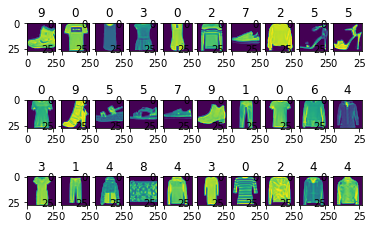

In [4]:

for i in range(30):
    plt.subplot(3,10,i+1)
    plt.title("{}".format(y[i]))
    plt.imshow(x[i])
plt.show()

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y[0]]

'Ankle boot'

#### Normalization


In [7]:
X= x/255.
X_test= x_test/255.

####  Train part & Valid part

In [8]:
X_train,X_valid = X[:5000],X[5000:]
y_train ,y_valid = y[:5000] ,y[5000:]

In [9]:
X_train
X_train.shape

(5000, 28, 28)

In [10]:
np.random.seed(0)
tf.random.set_seed(0)

#### Building our model

In [11]:
model= keras.models.Sequential()

In [12]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


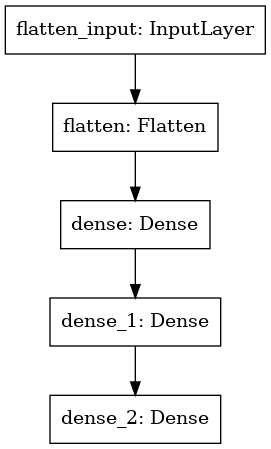

In [14]:
import pydot
keras.utils.plot_model(model)

In [15]:
weights,biases =model.layers[1].get_weights()

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

#### Compilation and Training

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
model_fit=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
157/157 [==============================] - 21s 113ms/step - loss: 1.7519 - accuracy: 0.4361 - val_loss: 1.0179 - val_accuracy: 0.6707
Epoch 2/30
157/157 [==============================] - 19s 122ms/step - loss: 0.9315 - accuracy: 0.6912 - val_loss: 0.7899 - val_accuracy: 0.7450
Epoch 3/30
157/157 [==============================] - 14s 89ms/step - loss: 0.7406 - accuracy: 0.7547 - val_loss: 0.7115 - val_accuracy: 0.7609
Epoch 4/30
157/157 [==============================] - 12s 77ms/step - loss: 0.6525 - accuracy: 0.7897 - val_loss: 0.7084 - val_accuracy: 0.7483
Epoch 5/30
157/157 [==============================] - 15s 98ms/step - loss: 0.6168 - accuracy: 0.7887 - val_loss: 0.6507 - val_accuracy: 0.7742
Epoch 6/30
157/157 [==============================] - 12s 74ms/step - loss: 0.5651 - accuracy: 0.8140 - val_loss: 0.6254 - val_accuracy: 0.7846
Epoch 7/30
157/157 [==============================] - 15s 98ms/step - loss: 0.5457 - accuracy: 0.8241 - val_loss: 0.6447 - val_accurac

In [20]:
model_fit.params

{'verbose': 1, 'epochs': 30, 'steps': 157}

In [21]:
model_fit.history

{'loss': [1.4215037822723389,
  0.861138105392456,
  0.7210310697555542,
  0.6479973793029785,
  0.6028026342391968,
  0.5643116235733032,
  0.5418244004249573,
  0.5208747982978821,
  0.49894794821739197,
  0.4865936040878296,
  0.4688273072242737,
  0.4628540873527527,
  0.4458921253681183,
  0.439128577709198,
  0.4281780421733856,
  0.4145192801952362,
  0.4096173346042633,
  0.4030653238296509,
  0.39505526423454285,
  0.3867533802986145,
  0.3834623694419861,
  0.37517914175987244,
  0.3738058805465698,
  0.37041446566581726,
  0.3594506084918976,
  0.35057881474494934,
  0.3468377888202667,
  0.3451057970523834,
  0.3389081656932831,
  0.33436471223831177],
 'accuracy': [0.5654000043869019,
  0.7157999873161316,
  0.7595999836921692,
  0.7888000011444092,
  0.7943999767303467,
  0.8144000172615051,
  0.8208000063896179,
  0.8270000219345093,
  0.8338000178337097,
  0.8392000198364258,
  0.8416000008583069,
  0.8464000225067139,
  0.8532000184059143,
  0.8489999771118164,
  0.856

In [22]:
pd.DataFrame(model_fit.history)

,loss,accuracy,val_loss,val_accuracy
0,1.421504,0.5654,1.017936,0.670691
1,0.861138,0.7158,0.789923,0.744964
2,0.721031,0.7596,0.711476,0.760927
3,0.647997,0.7888,0.708356,0.748309
4,0.602803,0.7944,0.650738,0.774200
5,0.564312,0.8144,0.625404,0.784564
6,0.541824,0.8208,0.644671,0.783291
7,0.520875,0.8270,0.603642,0.787509
8,0.498948,0.8338,0.554588,0.807345
9,0.486594,0.8392,0.584361,0.793618


<function matplotlib.pyplot.show(close=None, block=None)>

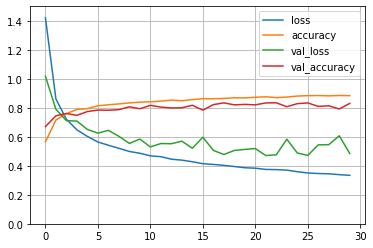

In [23]:
pd.DataFrame(model_fit.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show

#### Evaluate the model

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.5104 - accuracy: 0.8179


[0.510421097278595, 0.8179000020027161]

#### Prediction

In [25]:
clothings=X_test[:2]

In [26]:
y_proba=model.predict(clothings)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.108, 0.   , 0.163, 0.011,
        0.718],
       [0.   , 0.   , 0.926, 0.   , 0.003, 0.   , 0.071, 0.   , 0.   ,
        0.   ]], dtype=float32)

In [27]:
y_pred=model.predict_classes(clothings)
y_pred

/home/fido-koffivi-gbagbe/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2])

In [32]:
pred=np.array(class_names)[y_pred]
pred

array(['Ankle boot', 'Pullover'], dtype='<U11')

<function matplotlib.pyplot.show(close=None, block=None)>

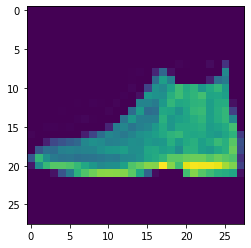

In [33]:
plt.imshow(X_test[0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

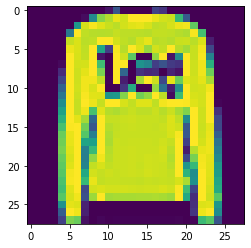

In [34]:
plt.imshow(X_test[1])
plt.show